### Relevante pakker

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

Merk: ChatGPT har blitt brukt for å få hjelp til å skrive deler av denne koden.

### Rense dataene

In [2]:
df = pd.read_csv("lego.population.csv", sep = ",", encoding = "latin1")



In [5]:
df2.groupby(['cat', 'Theme']).size().reset_index(name = 'Count')

,cat,Theme,Count
0,Andre Lisensierte kategorier,Batman,16
1,Andre Lisensierte kategorier,DC,9
2,Andre Lisensierte kategorier,Harry Potter,25
3,Andre Lisensierte kategorier,Jurassic World,20
4,Andre Lisensierte kategorier,Minecraft,26
5,Andre Lisensierte kategorier,Minions,2
6,Andre Lisensierte kategorier,Overwatch,8
7,Andre Lisensierte kategorier,Powerpuff Girls,2
8,Andre Lisensierte kategorier,Stranger Things,1
9,Andre Lisensierte kategorier,Unikitty,6


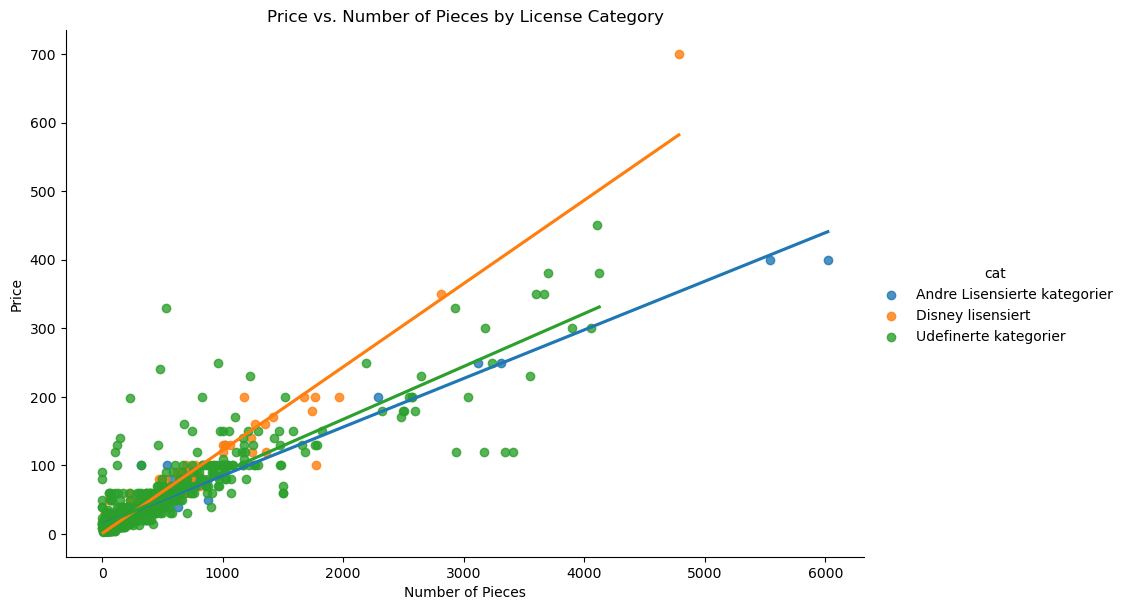

                       Category        R²       RMSE        MAE  \
0         Udefinerte kategorier  0.765952  28.014789  14.580376   
1             Disney lisensiert  0.932583  16.354690  10.095395   
2  Andre Lisensierte kategorier  0.960211  12.342738   8.367547   

   b0 (Intercept)  b1 (Pieces Coefficient)  \
0        7.208213                 0.067137   
1        6.630575                 0.136901   
2        3.718406                 0.052497   

                                              Errors  
0  [-11.004413346947233, -11.004413346947233, -7....  
1  [-2.6828551387610258, 2.8413896954768774, -4.2...  
2  [-7.294843302044823, -10.895828308821686, -3.7...  


In [44]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Plot regression lines for each category
sns.lmplot(x="Pieces", y="Price", hue="cat", data=df2, aspect=1.5, height=6, ci=None)
plt.title("Price vs. Number of Pieces by License Category")
plt.xlabel("Number of Pieces")
plt.ylabel("Price")
plt.show()

# Create a list to store results for each category
evaluation_results = []

# Loop through each unique category and fit a regression model
for category in df2['cat'].unique():
    subset = df2[df2['cat'] == category].copy()  # Filter data for the current category
    model = smf.ols('Price ~ Pieces + Unique_Pieces', data=subset).fit()  # Fit the regression model

    # Predict prices based on the model
    subset.loc[:, 'Predicted_Price'] = model.predict(subset)  # Use .loc to avoid warnings

    # Calculate metrics
    r_squared = model.rsquared  # Coefficient of determination
    rmse = np.sqrt(mean_squared_error(subset['Price'], subset['Predicted_Price']))  # Root Mean Squared Error
    mae = mean_absolute_error(subset['Price'], subset['Predicted_Price'])  # Mean Absolute Error

    # Extract coefficients
    b0 = model.params['Intercept']  # Intercept of the regression line
    b1 = model.params['Pieces']     # Coefficient for the 'Pieces' variable
    
    # Calculate errors (e) for each prediction
    subset['Error'] = subset['Price'] - subset['Predicted_Price']  # Actual Price - Predicted Price

    # Store results in a list
    evaluation_results.append({
        'Category': category,
        'R²': r_squared,       # Goodness of fit
        'RMSE': rmse,          # Measure of error
        'MAE': mae,            # Average error
        'b0 (Intercept)': b0,  # Intercept
        'b1 (Pieces Coefficient)': b1,  # Coefficient for 'Pieces'
        'Errors': subset['Error'].tolist()  # List of prediction errors for this category
    })

# Convert results to a DataFrame for easier viewing
evaluation_df = pd.DataFrame(evaluation_results)

# Print the results
print(evaluation_df)


In [45]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Loop through each unique category and fit a regression model, then print summary
for category in df2['cat'].unique():
    subset = df2[df2['cat'] == category].copy()  # Filter data for the current category
    model = smf.ols('Price ~ Pieces + Unique_Pieces', data=subset).fit()  # Fit the regression model

    # Display summary of the model for the current category
    print(f"Summary for Category: {category}")
    print(model.summary())
    print("\n" + "="*50 + "\n")


Summary for Category: Udefinerte kategorier
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     1078.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          1.53e-208
Time:                        13:54:23   Log-Likelihood:                -3145.6
No. Observations:                 662   AIC:                             6297.
Df Residuals:                     659   BIC:                             6311.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
In